# 

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
number_samples = 101
x, dx = np.linspace(start=0, stop=1, num=number_samples, retstep=True)
k = 1e-1  # thermal conductivity
A = 1e-3  # cross section area
iteration = 0
epsilon = 1e-8
numeric_error = 1.0
max_iterations = 300
tolerance = 1e-8
T = np.zeros_like(x)
T[-1] = 1  # Initial condition
T_new = T.copy()

In [7]:
while (numeric_error > tolerance) and (iteration < max_iterations):
    for i in range(0, number_samples - 1):
        a_W = a_E = k * A / dx
        if i == 0:
            a_W = 0

        T_new[1:-1] = (a_E * T[2:] + a_W * T[:-2]) / (a_E + a_W)

    numeric_error = np.sum(np.abs(T_new[1:-1] - T[1:-1]))
    iteration += 1
    T = T_new.copy()

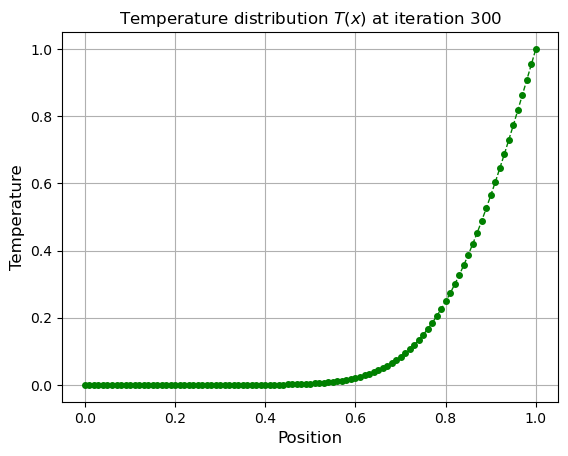

In [9]:
plt.cla()
plt.plot(x, T, "go--", linewidth=1, markersize=4)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Temperature", fontsize=12)
plt.grid()
plt.title(f"Temperature distribution $T(x)$ at iteration {iteration}", fontsize=12);